# Environment setup

### Library preparation

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [5]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [6]:
SAMPLE = 'D060B2N2'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [7]:
full_table = pd.read_excel("..\chain table.xlsx")


In [8]:
show_df(full_table, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D060B2N2,40.0f,185.9m,222.2m,9.3n,2.5p,4,2.0,30.5k,122000,7.0M,920.9M,28.0M,318.6u,Fin,measd_lv,574.8m


# Import from origin

In [28]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


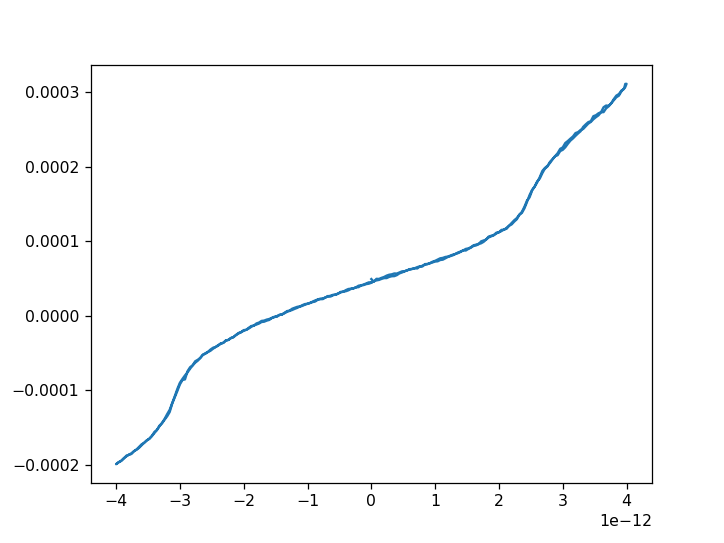

In [77]:
x, y = read_opj_data(cols = (4,5), preprint = True)

Starting experimental run with id: 5


<IPython.core.display.Javascript object>


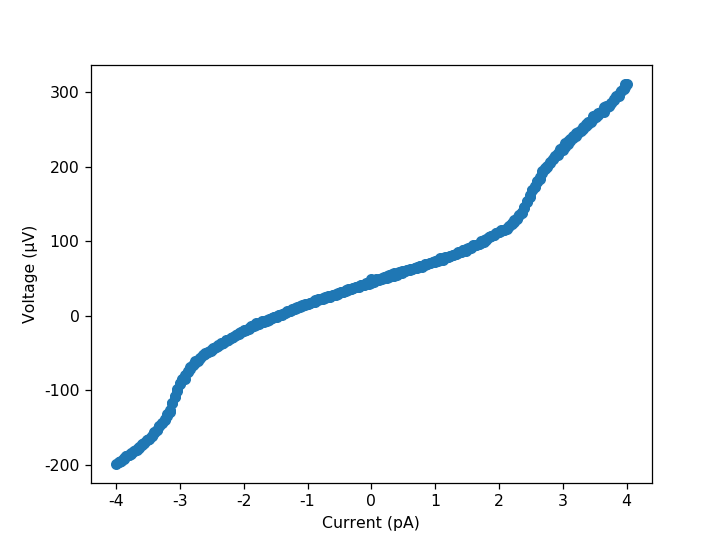

In [79]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC fine')
pbi(runid)

# Report

## Overview IVC

<IPython.core.display.Javascript object>


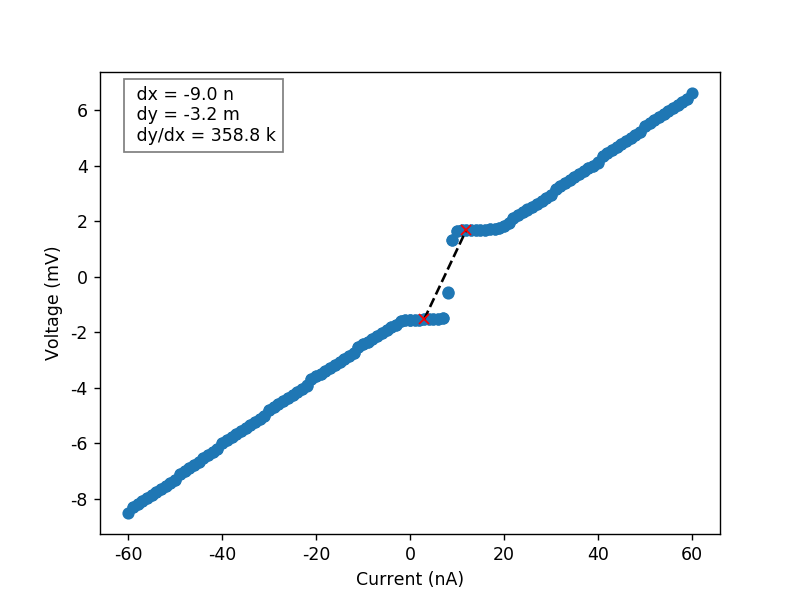

In [9]:
pbi(3, interactive = True)

**Vg = 1.6 mV**

**N = 4**

**Rn_tot = 122k**


In [10]:
1.6/400

0.004

<IPython.core.display.Javascript object>


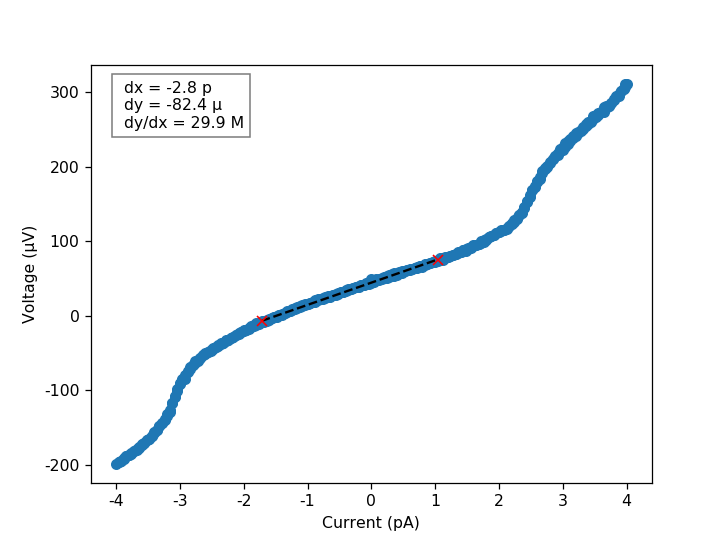

In [76]:
pbi(2, interactive = True)

## IVC fine scan

<IPython.core.display.Javascript object>


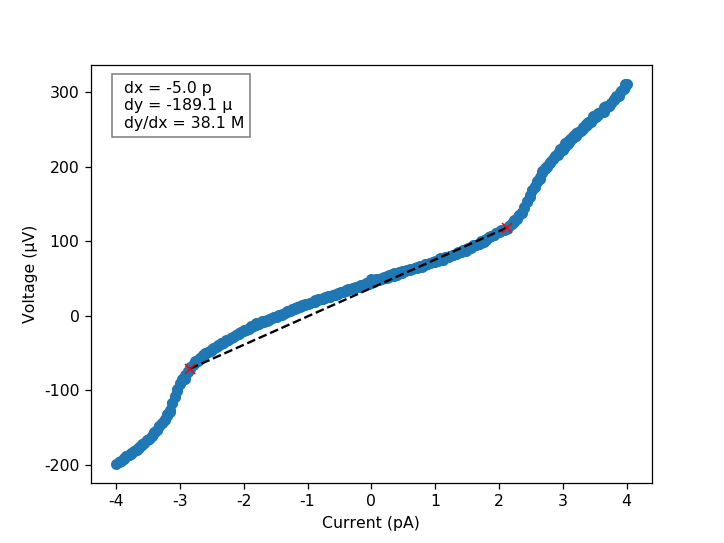

In [80]:
pbi(5, interactive = True)

**Ro_tot = 28 MOhm**

**Isw = 2.5pA**

# Datatable update

In [102]:
ft = pd.read_excel("..\chain table.xlsx")

show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D060B2N2,40.0f,185.9m,227.8m,9.6n,2.7p,4,2.0,29.8k,119000,7.3M,920.9M,29.1M,318.6u,Fin,fabd,582.0m


In [103]:
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : 122e3,
               'Ro_tot'  : 28e6,
               'Isw'     : 2.5e-12,
               'N'       : 4,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D060B2N2,40.0f,185.9m,222.2m,9.3n,2.5p,4,2.0,30.5k,122.0k,7.0M,920.9M,28.0M,318.6u,Fin,measd_lv,574.8m


In [104]:
ft.to_excel("..\chain table.xlsx")